IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME11: projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Manea Dorin-Mihai, 21302798

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et **un seul rendu sur un des deux comptes Moodle doit être fait**.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**Ce TD-TME11 est prévu pour être fait lors de la dernière séance de TD-TME11 de votre groupe.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-11-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2024


## Date de remise 

Le travail doit être rendu (sur le site Moodle) avant le <font size="+1" color="RED"><b>vendredi 17 mai 2024, à 18h</b></font>
    

<b>Il n'y aura pas d'extension de la date de remise autorisée : <font size="+1" color="RED">aucun rendu ne sera accepté après 18h.</font></b>

<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

## Travail à faire

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

Appliquer les algorithmes d'apprentissage non supervisés vus en cours (CAH et k-moyennes) sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- *Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 21 mai 2024**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- tme-11/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.



In [3]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : Pen-Based Recognition of Handwritten Digits

documentation: <a href="https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits" target="NEW">page UCI</a> (mais l'essentiel est donné ci-après).

Pour télécharger les données, la façon la plus simple est d'installer la librairie de l'UCI:

    pip install -U ucimlrepo

ensuite, on peut lancer la boîte suivante.

S'il n'est pas possible d'installer cette librairie, les données sont accessibles sur la page web citée ci-dessus (cliquer sur "Download" en haut et à droite de la page).

### Chargement des données

In [5]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
pen_dataset = fetch_ucirepo(id=81)

# access data
X = pen_dataset.data.features
y = pen_dataset.data.targets

# access metadata
print(pen_dataset.metadata.uci_id)
print(pen_dataset.metadata.num_instances)
print(pen_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(pen_dataset.variables)

81
10992
We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution.  Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to wr

In [3]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0
10988,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14
10989,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93
10990,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81


In [4]:
y

,Class
0,8
1,2
2,1
3,4
4,1
...,...
10987,4
10988,2
10989,0
10990,0


### Apprentissage non-supervisé

Pour ce sujet, vous considèrerez seulement les données de description (features X) sur lesquelles vous proposerez des expérimentations des algorithmes d'apprentissage non-supervisé vus en cours mettant en évidence des clusters et leur évaluation.

Ainsi, vous devrez:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).


   


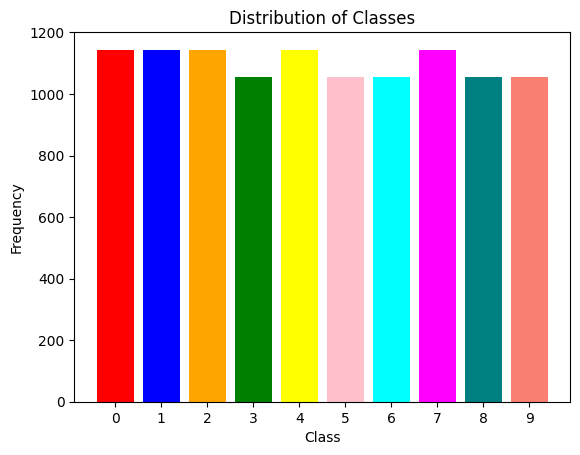

In [6]:
noms = [col for col in X.columns]

# Remplir les valeurs nulles
X = X.ffill()

# étape de normailisation nécessaire !
X_norm = clust.normalisation(X)

# Passer du dataframe à des arrays:
desc = np.array(X_norm[noms])
label = np.array(y['Class'])

# dimension des données
n = desc.shape[0]
classes, class_counts = np.unique(y.Class, return_counts=True)
nb_classes = len(classes)

plt.bar(classes, class_counts, color=['red', 'blue', 'orange', 'green', 'yellow', 'pink', 'aqua', 'magenta', 'teal', 'salmon'])
plt.xticks(classes)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.show()

Par conséquent, les données sont uniformément réparties, surtout après le mélange.

In [8]:
import seaborn as sns

Text(0.5, 1.0, 'Correlogram')

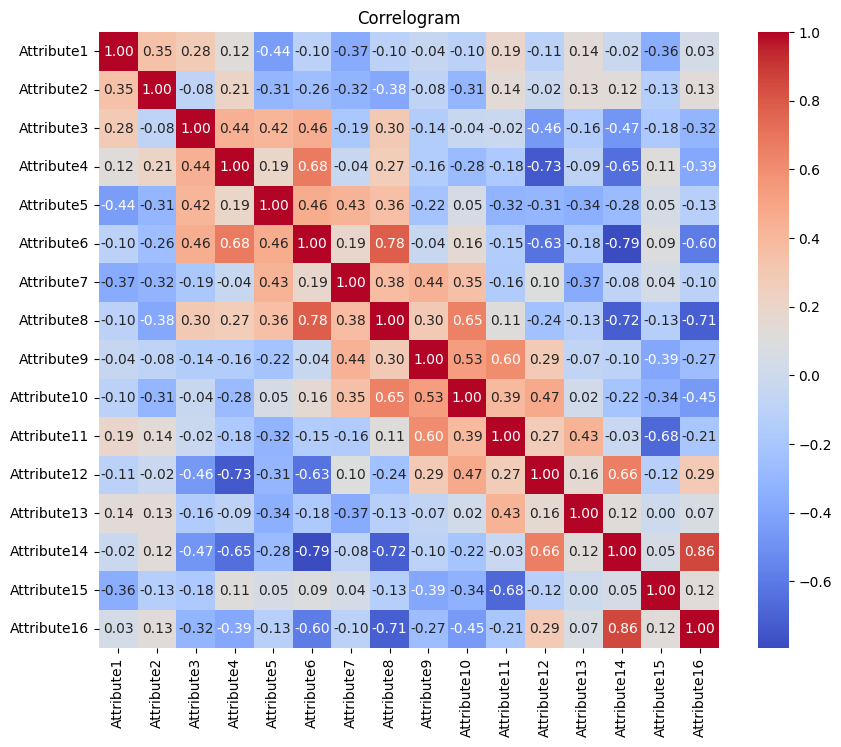

In [9]:
# correlation matrix
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlogram')

Les attributs indexés avec des nombres adjacents sont plus positivement corrélés, et ceux indexés avec des nombres éloignés sont plus négativement corrélés. Cependant, ces corrélations sont pour la plupart au maximum modérées et pas vraiment fortes.


In [11]:
import sklearn.linear_model

In [12]:
reg = sklearn.linear_model.LinearRegression().fit(X, y)
reg.score(X, y)

0.3384738699630925

Un coefficient de détermination $R^2 =0.34$ indique qu'environ $34$ % de la variabilité de la variable dépendante (la variable à prédire - $num$) peut être expliquée par les variables indépendantes dans le modèle de régression.

In [7]:
n_petit = n // 200
idx = np.random.choice(n, n_petit, replace=False)
petit_sample = X_norm.iloc[idx]
print("Dimension d'échantillon : ", len(petit_sample))
petit_label = y.iloc[idx]

Dimension d'échantillon :  54


Puisque la base de données est trop grande, j'ai extrait un échantillon plus petit de manière aléatoire. Ensuite, les résultats pourraient être confirmés pour d'autres échantillons.

In [16]:
import time

### Classification Hiérarchique Ascendante (CHA)

Les classifications utilisent la distance euclidienne comme métrique et différents types de linkage entre les clusters : $centroid$, $complete$, $average$, $simple$.

In [18]:
tic = time.time()  # On lance le chrono
final_res = clust.CHA(petit_sample, 'centroid', False, True)
toc = time.time()  # On arrête le chrono
print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(final_res)

KeyboardInterrupt: 

Text(0, 0.5, 'Cluster Size')

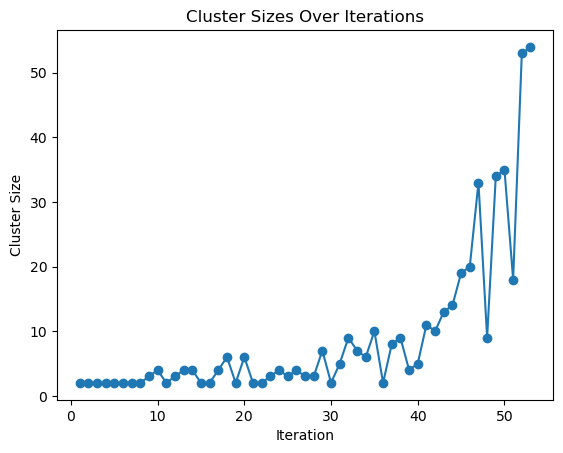

In [46]:
cluster_sizes = [iteration_result[-1] for iteration_result in final_res]
plt.plot(range(1, len(cluster_sizes) + 1), cluster_sizes, marker='o', linestyle='-')
plt.title('Cluster Sizes Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cluster Size')

CHA_complete: clustering hiérarchique ascendant, version Complete Linkage
fusionne: distance minimale trouvée entre  [8, 39]  =  0.1902629759044045
fusionne: les 2 clusters dont les clés sont  [8, 39]  sont fusionnés
fusionne: on crée la nouvelle clé 54  dans le dictionnaire.
fusionne: les clés de  [8, 39]  sont supprimées car leurs clusters ont été fusionnés.
CHA_complete: une fusion réalisée de 8  avec  39 de distance  0.1903
CHA_complete: le nouveau cluster contient  2  exemples
fusionne: distance minimale trouvée entre  [24, 48]  =  0.31
fusionne: les 2 clusters dont les clés sont  [24, 48]  sont fusionnés
fusionne: on crée la nouvelle clé 55  dans le dictionnaire.
fusionne: les clés de  [24, 48]  sont supprimées car leurs clusters ont été fusionnés.
CHA_complete: une fusion réalisée de 24  avec  48 de distance  0.3100
CHA_complete: le nouveau cluster contient  2  exemples
fusionne: distance minimale trouvée entre  [23, 30]  =  0.3436568055487916
fusionne: les 2 clusters dont les c

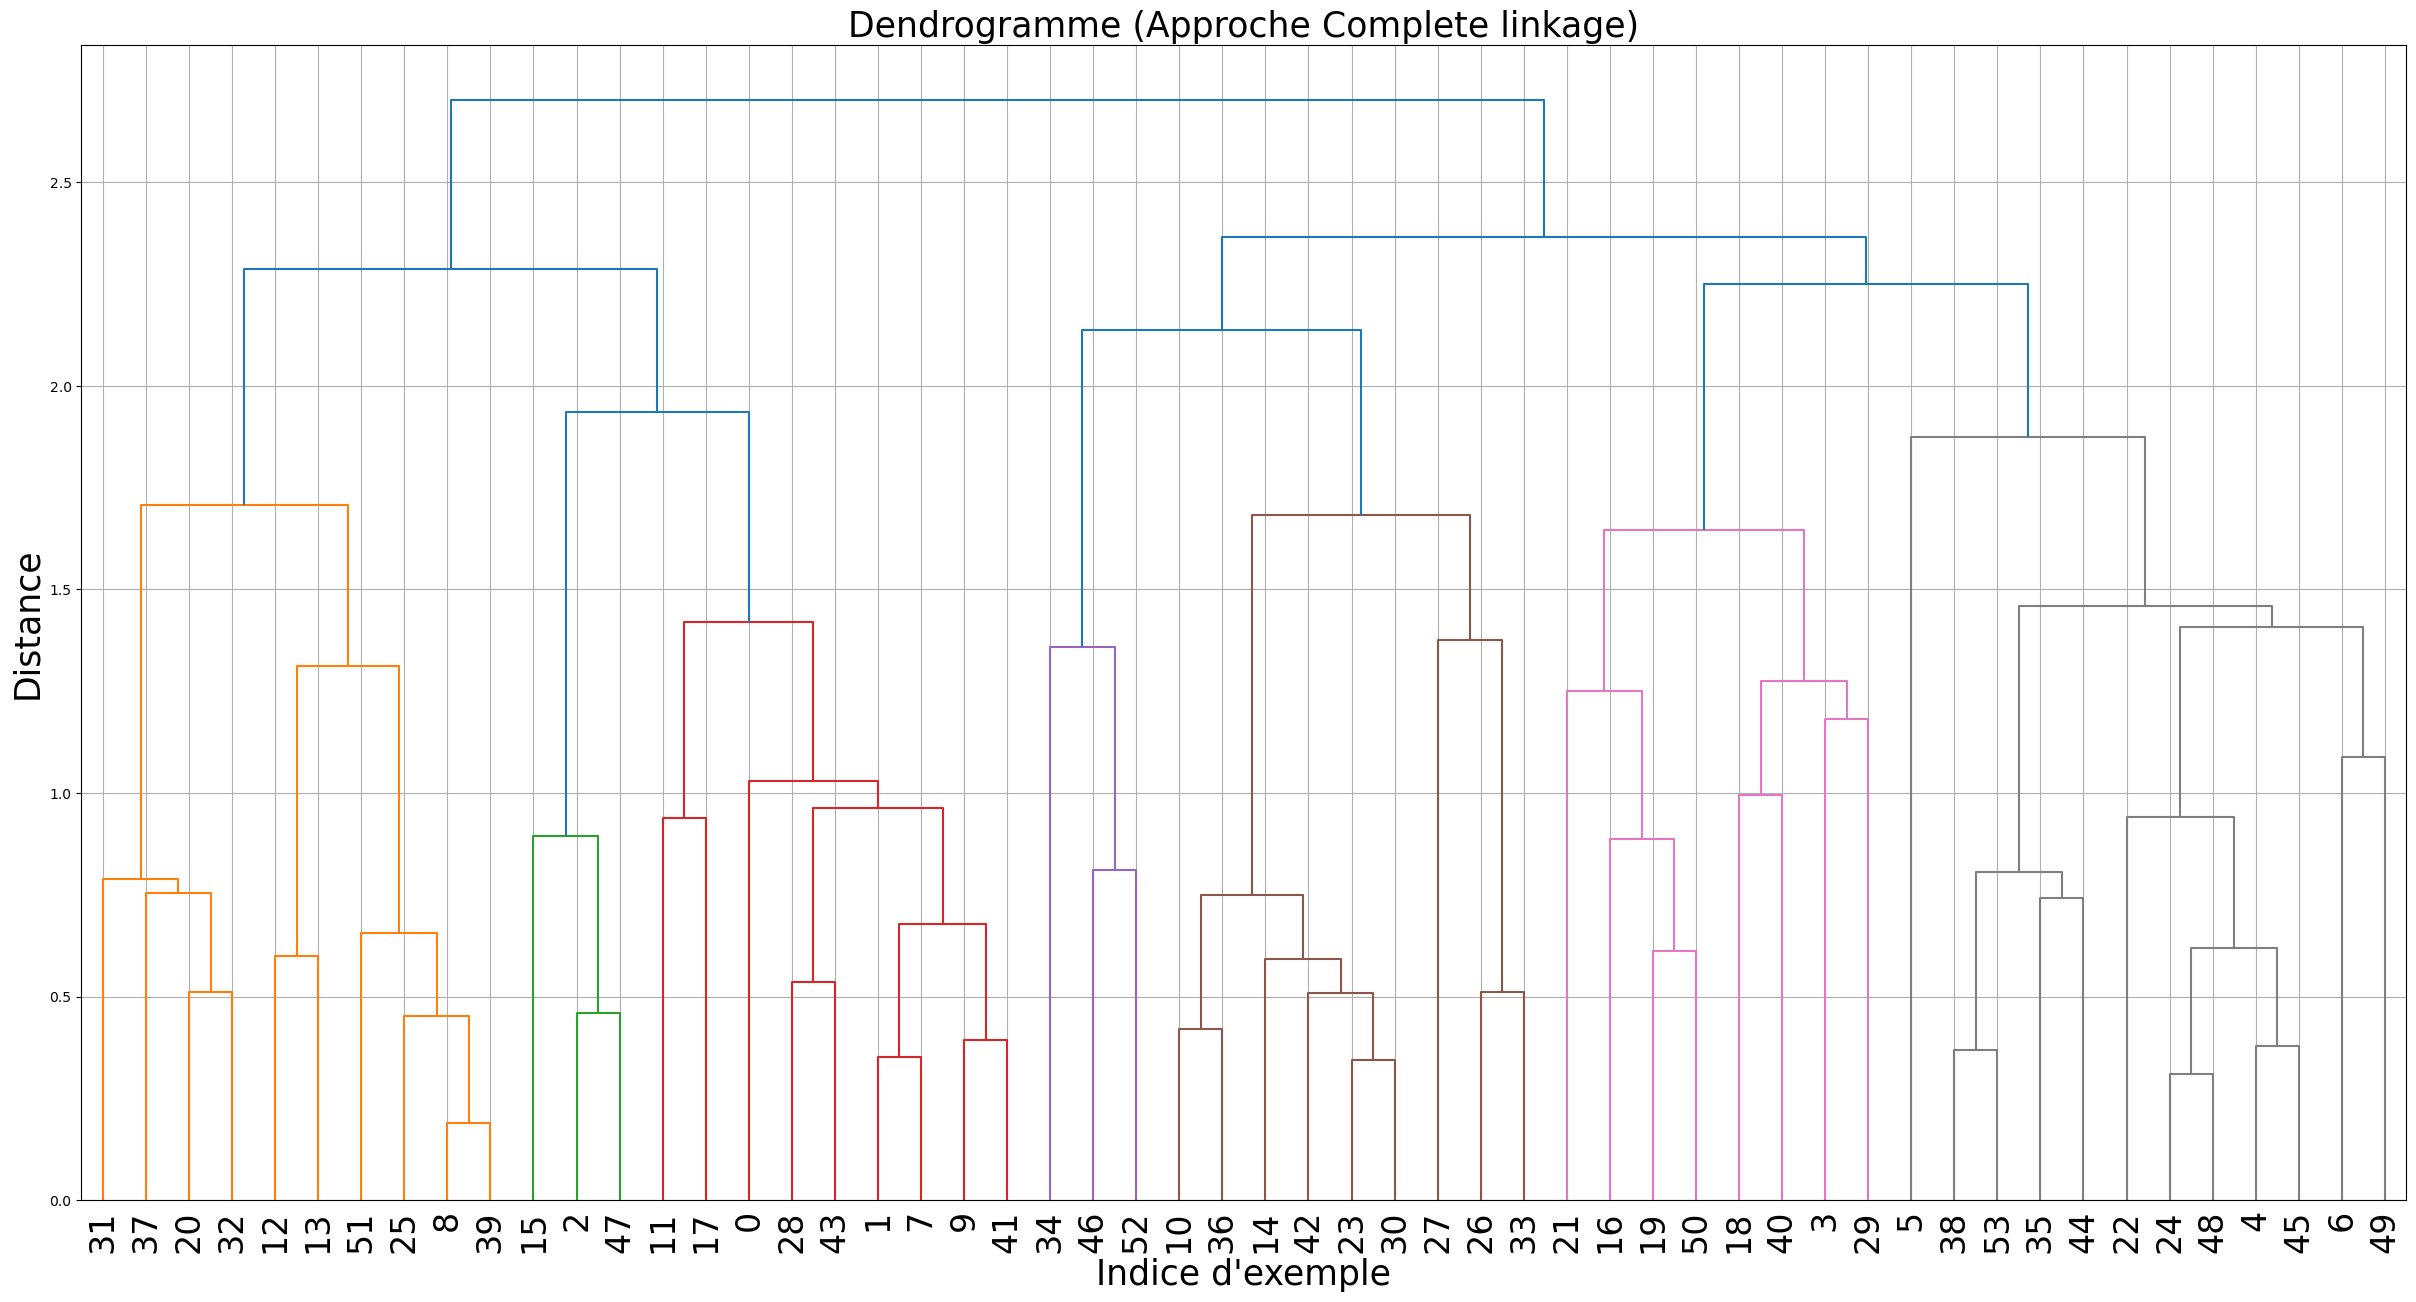

In [47]:
tic = time.time()  # On lance le chrono
final_res = clust.CHA(petit_sample, 'complete', False, True)
toc = time.time()  # On arrête le chrono
print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(final_res)

Text(0, 0.5, 'Cluster Size')

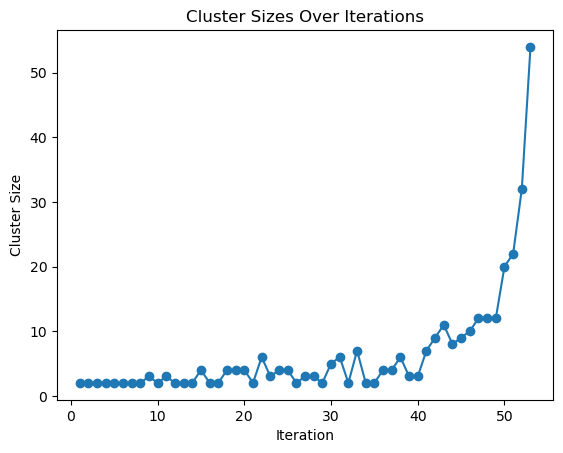

In [48]:
cluster_sizes = [iteration_result[-1] for iteration_result in final_res]
plt.plot(range(1, len(cluster_sizes) + 1), cluster_sizes, marker='o', linestyle='-')
plt.title('Cluster Sizes Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cluster Size')

CHA_average: clustering hiérarchique ascendant, version Average Linkage
fusionne_average: distance moyenne minimale trouvée entre  [8, 39]  =  0.1902629759044045
fusionne_average: les 2 clusters dont les clés sont  [8, 39]  sont fusionnés
fusionne_average: on crée la nouvelle clé 54  dans le dictionnaire.
fusionne_average: les clés de  [8, 39]  sont supprimées car leurs clusters ont été fusionnés.
CHA_average: une fusion réalisée de 8  avec  39 de distance  0.1903
CHA_average: le nouveau cluster contient  2  exemples
fusionne_average: distance moyenne minimale trouvée entre  [24, 48]  =  0.31
fusionne_average: les 2 clusters dont les clés sont  [24, 48]  sont fusionnés
fusionne_average: on crée la nouvelle clé 55  dans le dictionnaire.
fusionne_average: les clés de  [24, 48]  sont supprimées car leurs clusters ont été fusionnés.
CHA_average: une fusion réalisée de 24  avec  48 de distance  0.3100
CHA_average: le nouveau cluster contient  2  exemples
fusionne_average: distance moyenne m

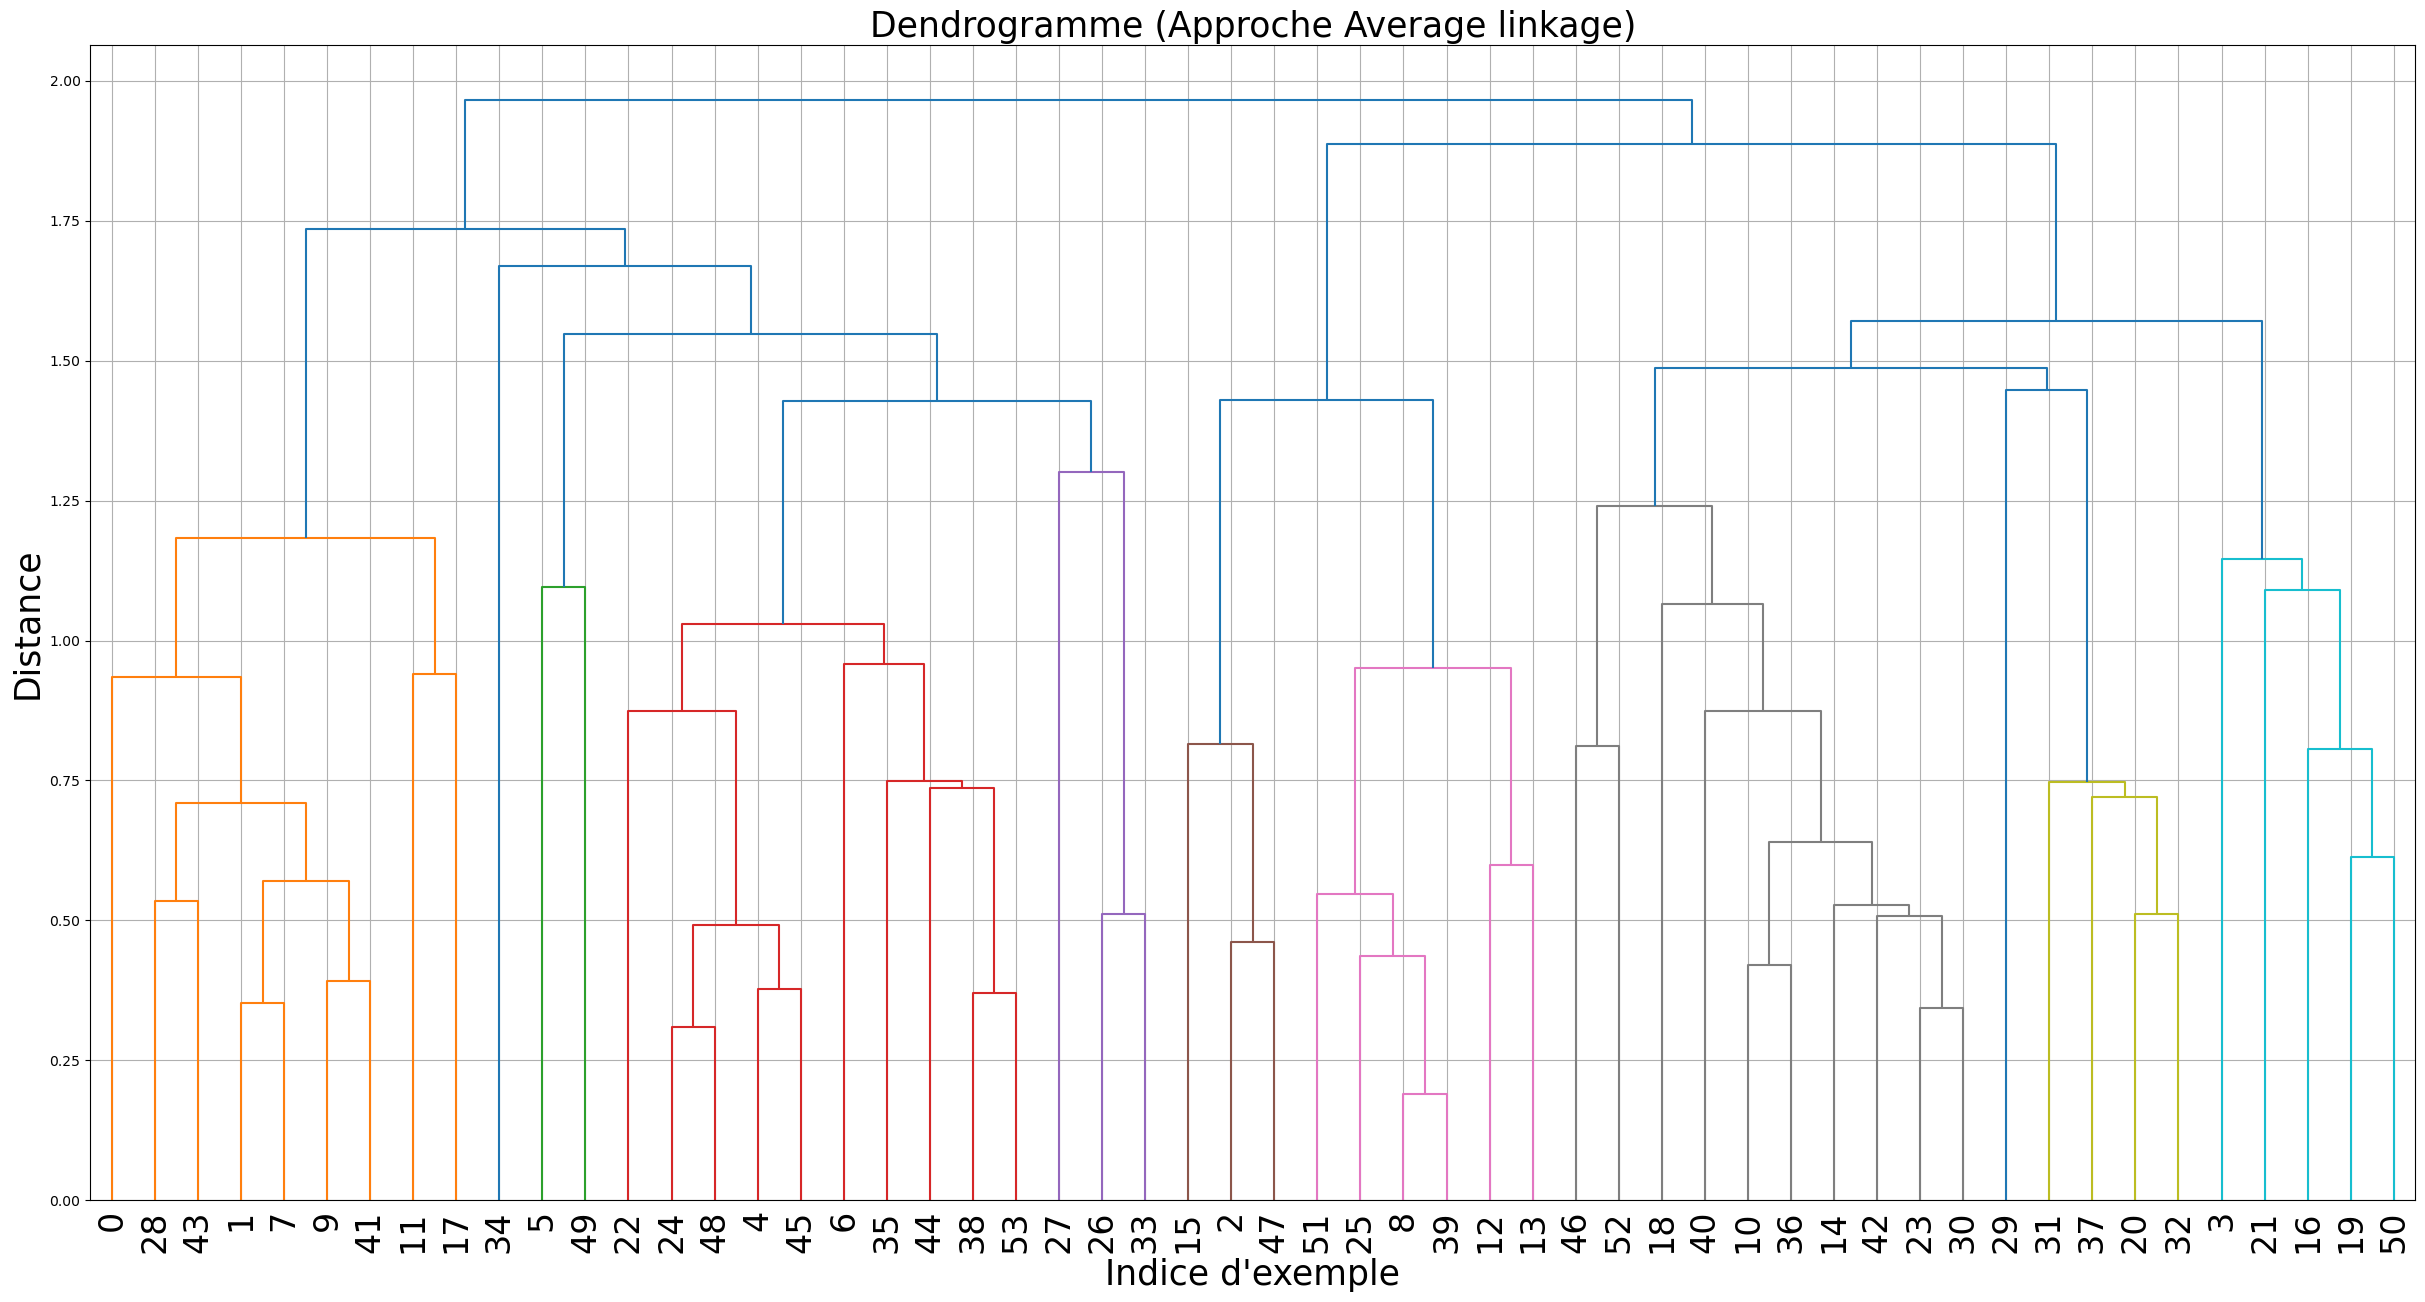

In [49]:
tic = time.time()  # On lance le chrono
final_res = clust.CHA(petit_sample, 'average', False, True)
toc = time.time()  # On arrête le chrono
print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(final_res)

Text(0, 0.5, 'Cluster Size')

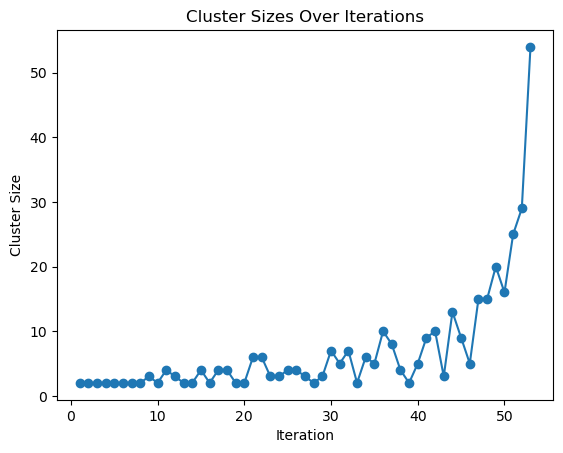

In [50]:
cluster_sizes = [iteration_result[-1] for iteration_result in final_res]
plt.plot(range(1, len(cluster_sizes) + 1), cluster_sizes, marker='o', linestyle='-')
plt.title('Cluster Sizes Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cluster Size')

CHA_simple: clustering hiérarchique ascendant, version Simple Linkage
fusionne_simple: distance minimale trouvée entre  [8, 39]  =  0.1902629759044045
fusionne_simple: les 2 clusters dont les clés sont  [8, 39]  sont fusionnés
fusionne_simple: on crée la nouvelle clé 54  dans le dictionnaire.
fusionne_simple: les clés de  [8, 39]  sont supprimées car leurs clusters ont été fusionnés.
CHA_simple: une fusion réalisée de 8  avec  39 de distance  0.1903
CHA_simple: le nouveau cluster contient  2  exemples
fusionne_simple: distance minimale trouvée entre  [24, 48]  =  0.31
fusionne_simple: les 2 clusters dont les clés sont  [24, 48]  sont fusionnés
fusionne_simple: on crée la nouvelle clé 55  dans le dictionnaire.
fusionne_simple: les clés de  [24, 48]  sont supprimées car leurs clusters ont été fusionnés.
CHA_simple: une fusion réalisée de 24  avec  48 de distance  0.3100
CHA_simple: le nouveau cluster contient  2  exemples
fusionne_simple: distance minimale trouvée entre  [4, 55]  =  0.31

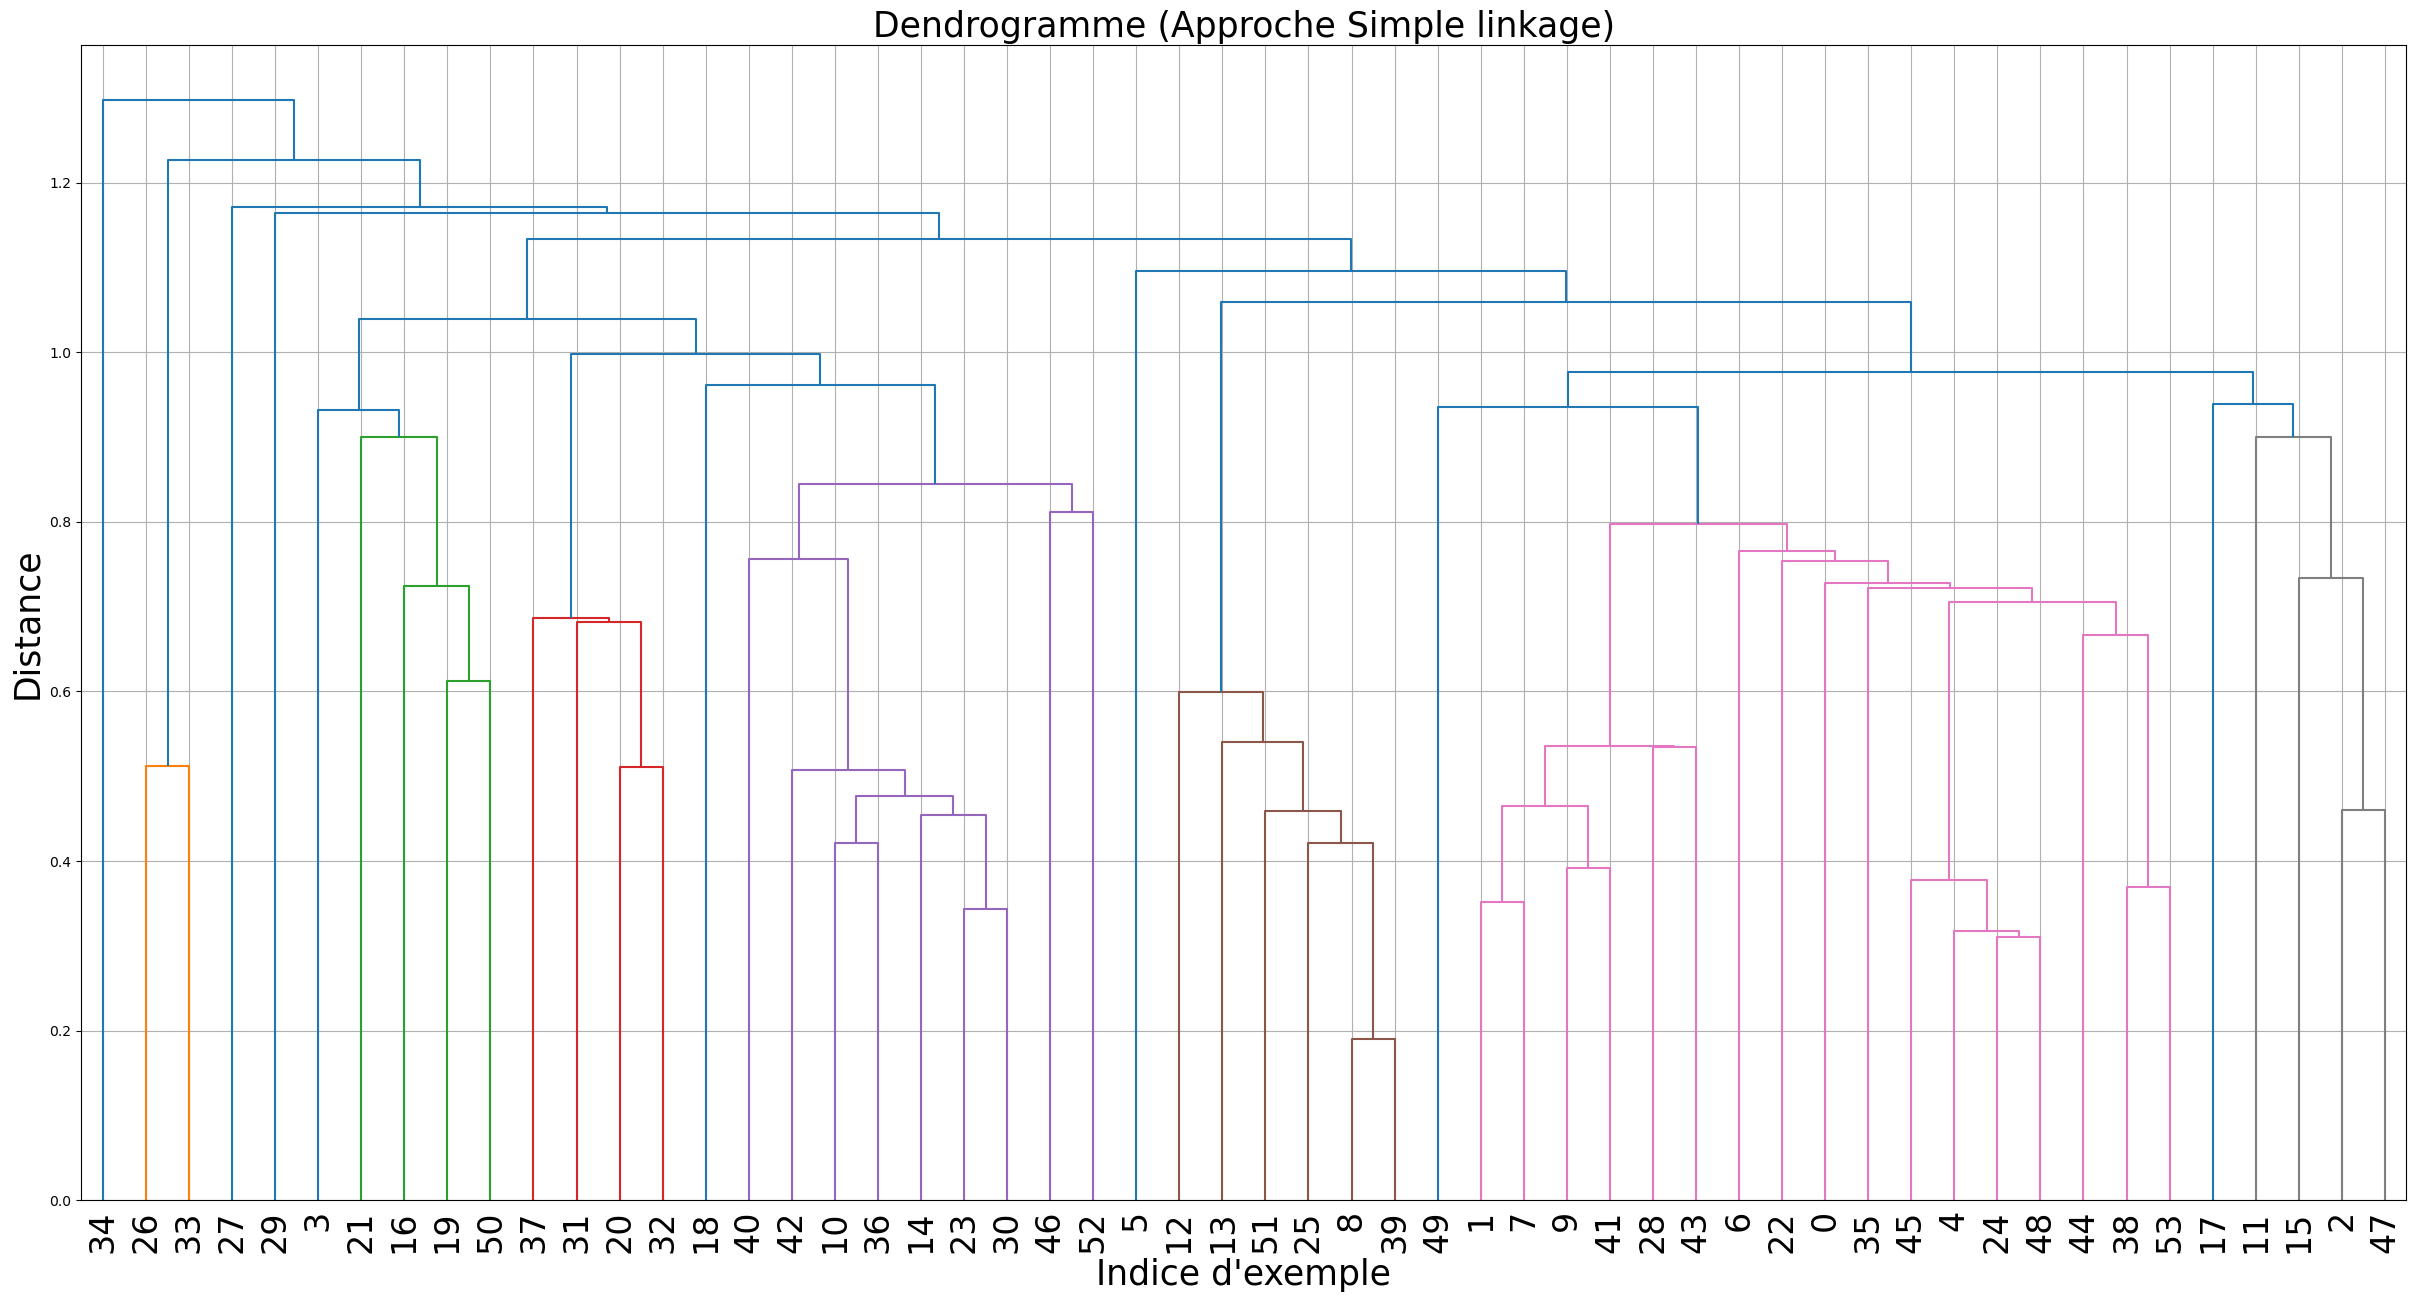

In [51]:
tic = time.time()  # On lance le chrono
final_res = clust.CHA(petit_sample, 'simple', False, True)
toc = time.time()  # On arrête le chrono
print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(final_res)

Text(0, 0.5, 'Cluster Size')

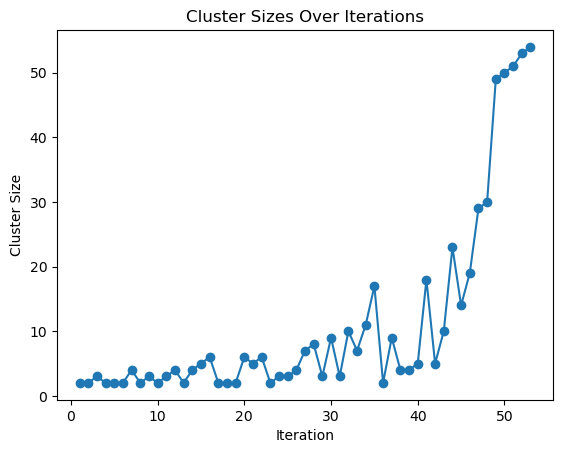

In [52]:
cluster_sizes = [iteration_result[-1] for iteration_result in final_res]
plt.plot(range(1, len(cluster_sizes) + 1), cluster_sizes, marker='o', linestyle='-')
plt.title('Cluster Sizes Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cluster Size')

### K-moyennes

En augmentant $k$ pour observer l'impact sur la inertie du système (co-inertie).

iteration 1 Inertie: 66.7210 Difference: 65.6710
iteration 2 Inertie: 61.7333 Difference: 4.9877
iteration 3 Inertie: 61.0509 Difference: 0.6824
iteration 4 Inertie: 60.3687 Difference: 0.6822
iteration 5 Inertie: 59.5035 Difference: 0.8652
iteration 6 Inertie: 59.2548 Difference: 0.2487
iteration 7 Inertie: 59.2548 Difference: 0.0000
iteration 1 Inertie: 46.6725 Difference: 45.6225
iteration 2 Inertie: 46.4985 Difference: 0.1740
iteration 3 Inertie: 46.4985 Difference: 0.0000
iteration 1 Inertie: 37.6029 Difference: 36.5529
iteration 2 Inertie: 36.9143 Difference: 0.6886
iteration 3 Inertie: 36.4810 Difference: 0.4333
iteration 4 Inertie: 35.9221 Difference: 0.5589
iteration 5 Inertie: 35.9221 Difference: 0.0000
iteration 1 Inertie: 34.7784 Difference: 33.7284
iteration 2 Inertie: 29.8902 Difference: 4.8882
iteration 3 Inertie: 29.8902 Difference: 0.0000
iteration 1 Inertie: 25.5704 Difference: 24.5204
iteration 2 Inertie: 23.9444 Difference: 1.6260
iteration 3 Inertie: 23.9444 Differ

([<matplotlib.axis.XTick at 0x2cdfe6cb580>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

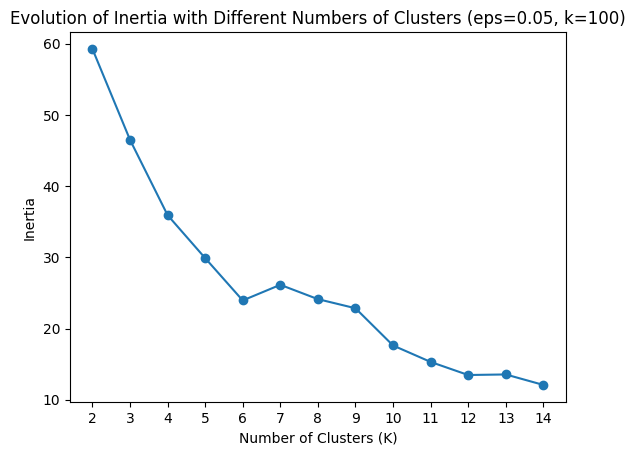

In [10]:
k_values = range(2, 15)
k_models = [clust.kmoyennes(k, petit_sample, 0.05, 100) for k in k_values]
inertias = [clust.inertie_globale(petit_sample, model[1]) for model in k_models]

plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.title('Evolution of Inertia with Different Numbers of Clusters (eps=0.05, k=100)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)

En augmentant le **taux d'apprentissage** pour observer l'impact sur la inertie du système (co-inertie).

iteration 1 Inertie: 19.2111 Difference: 18.2061
iteration 2 Inertie: 18.4336 Difference: 0.7776
iteration 3 Inertie: 18.4336 Difference: 0.0000
iteration 1 Inertie: 18.9590 Difference: 17.9400
iteration 2 Inertie: 17.9428 Difference: 1.0162
iteration 3 Inertie: 17.8331 Difference: 0.1097
iteration 4 Inertie: 17.8331 Difference: 0.0000
iteration 1 Inertie: 17.5021 Difference: 16.4693
iteration 2 Inertie: 16.7753 Difference: 0.7268
iteration 3 Inertie: 16.6785 Difference: 0.0969
iteration 4 Inertie: 16.5027 Difference: 0.1757
iteration 5 Inertie: 16.5027 Difference: 0.0000
iteration 1 Inertie: 20.5030 Difference: 19.4562
iteration 2 Inertie: 17.9013 Difference: 2.6017
iteration 3 Inertie: 16.6704 Difference: 1.2310
iteration 4 Inertie: 16.1579 Difference: 0.5125
iteration 5 Inertie: 16.1579 Difference: 0.0000
iteration 1 Inertie: 18.7767 Difference: 17.7160
iteration 2 Inertie: 16.8981 Difference: 1.8786
iteration 3 Inertie: 16.5689 Difference: 0.3291
iteration 4 Inertie: 16.5689 Differ

Text(0, 0.5, 'Inertia')

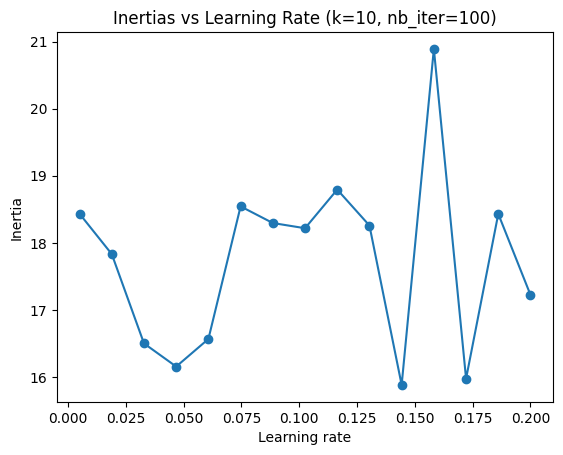

In [21]:
eps_values = np.linspace(0.005, 0.2, 15)
k_models_1 = [clust.kmoyennes(10, petit_sample, eps, 100) for eps in eps_values]
inertias_1 = [clust.inertie_globale(petit_sample, model[1]) for model in k_models_1]

plt.plot(eps_values, inertias_1, marker='o', linestyle='-')
plt.title('Inertias vs Learning Rate (k=10, nb_iter=100)')
plt.xlabel('Learning rate')
plt.ylabel('Inertia')

En augmentant le **nombre maximum d'itérations** pour observer l'impact sur la inertie du système (co-inertie).

iteration 1 Inertie: 27.1709 Difference: 26.1209
iteration 2 Inertie: 22.5746 Difference: 4.5963
iteration 3 Inertie: 18.7884 Difference: 3.7862
iteration 4 Inertie: 17.6374 Difference: 1.1510
iteration 5 Inertie: 17.0693 Difference: 0.5682
iteration 6 Inertie: 16.7254 Difference: 0.3438
iteration 7 Inertie: 16.4711 Difference: 0.2543
iteration 8 Inertie: 16.4711 Difference: 0.0000
iteration 1 Inertie: 31.0910 Difference: 30.0410
iteration 2 Inertie: 24.2980 Difference: 6.7930
iteration 3 Inertie: 21.7717 Difference: 2.5263
iteration 4 Inertie: 20.1422 Difference: 1.6295
iteration 5 Inertie: 18.9847 Difference: 1.1575
iteration 6 Inertie: 18.9847 Difference: 0.0000
iteration 1 Inertie: 19.9208 Difference: 18.8708
iteration 2 Inertie: 18.7409 Difference: 1.1799
iteration 3 Inertie: 17.4765 Difference: 1.2645
iteration 4 Inertie: 17.4765 Difference: 0.0000
iteration 1 Inertie: 34.3752 Difference: 33.3252
iteration 2 Inertie: 25.3167 Difference: 9.0585
iteration 3 Inertie: 22.8262 Differe

Text(0, 0.5, 'Inertia')

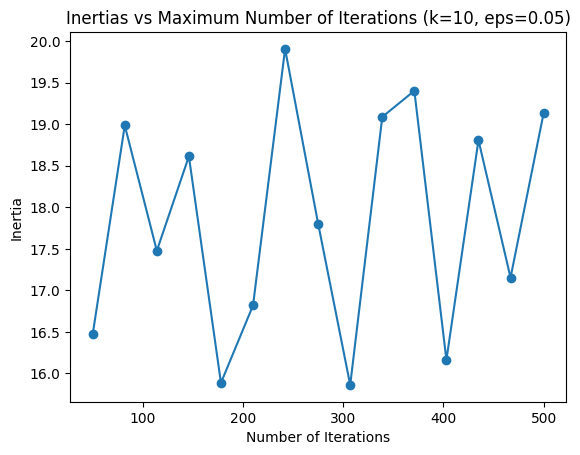

In [22]:
nb_iter = np.linspace(50, 500, 15, dtype=int)
k_models_2 = [clust.kmoyennes(10, petit_sample, 0.05, n) for n in nb_iter]
inertias_2 = [clust.inertie_globale(petit_sample, model[1]) for model in k_models_2]

plt.plot(nb_iter, inertias_2, marker='o', linestyle='-')
plt.title('Inertias vs Maximum Number of Iterations (k=10, eps=0.05)')
plt.xlabel('Number of Iterations')
plt.ylabel('Inertia')

La performance des modèles de k-means peut être évaluée en utilisant l'**indice de Xie-Beni** ou l'**indice de Dunn**.

#### Xie-Beni Index

In [17]:
def xie_beni_index(DF, U, linkage='centroid'):
    co_inertie = clust.inertie_globale(DF, U)
    semin = np.inf
    n = 0

    # séparation minimale
    for i, c1 in U.items():
        n += len(c1)
        for j, c2 in U.items():
            if i != j:
                if linkage == 'complete':
                    dist = clust.dist_complete(DF.iloc[c1], DF.iloc[c2])[0]
                elif linkage == 'single':
                    dist = clust.dist_simple(DF.iloc[c1], DF.iloc[c2])[0]
                elif linkage == 'average':
                    dist = clust.dist_average(DF.iloc[c1], DF.iloc[c2])[0]
                else:
                    dist = clust.dist_centroides(DF.iloc[c1], DF.iloc[c2])

                semin = min(dist, semin)

    xie_beni_index = co_inertie / (semin * n)

    return xie_beni_index

Text(0, 0.5, 'Xie-Beni Index')

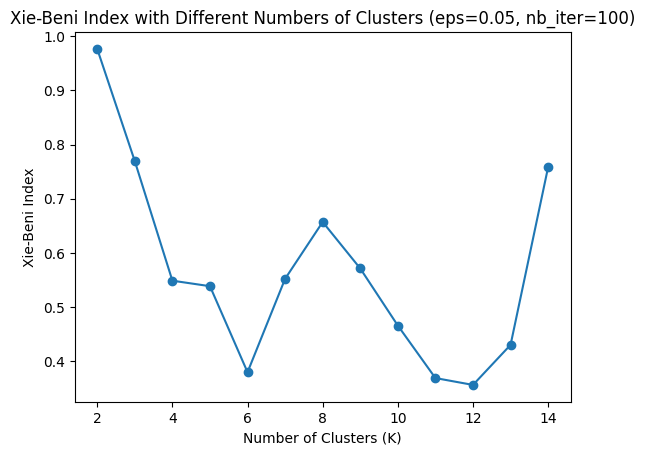

In [25]:
xie_beni = [xie_beni_index(petit_sample, model[1]) for model in k_models]
plt.plot(k_values, xie_beni, marker='o', linestyle='-')
plt.title('Xie-Beni Index with Different Numbers of Clusters (eps=0.05, nb_iter=100)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Xie-Beni Index')

Text(0, 0.5, 'Xie-Beni Index')

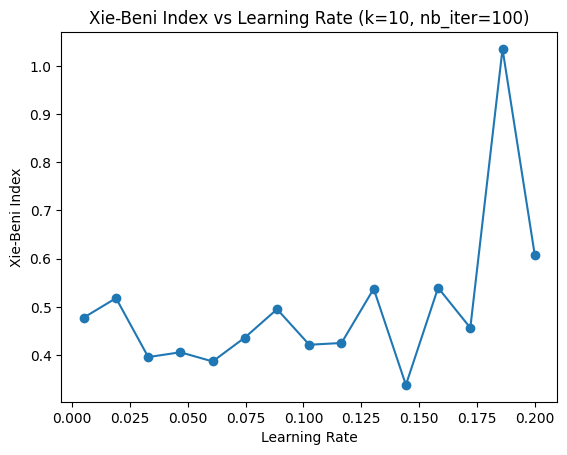

In [52]:
xie_beni = [xie_beni_index(petit_sample, model[1]) for model in k_models_1]
plt.plot(eps_values, xie_beni, marker='o', linestyle='-')
plt.title('Xie-Beni Index vs Learning Rate (k=10, nb_iter=100)')
plt.xlabel('Learning Rate')
plt.ylabel('Xie-Beni Index')

Text(0, 0.5, 'Xie-Beni Index')

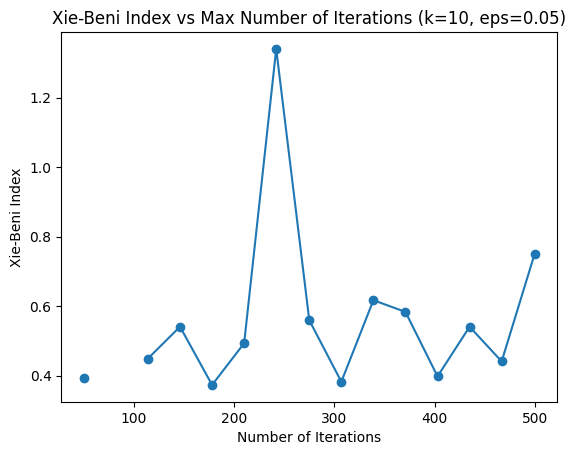

In [28]:
xie_beni = [xie_beni_index(petit_sample, model[1]) for model in k_models_2]
plt.plot(nb_iter, xie_beni, marker='o', linestyle='-')
plt.title('Xie-Beni Index vs Max Number of Iterations (k=10, eps=0.05)')
plt.xlabel('Number of Iterations')
plt.ylabel('Xie-Beni Index')

#### Dunn Index

In [50]:
def dunn_index(DF, U, linkage='centroid'):
    co_distance = 0

    for c in U.values():
        max_distance = 0

        for i, point1 in DF.iloc[c].iterrows():
            for j, point2 in DF.iloc[c].iterrows():
                distance = clust.dist_euclidienne(point1, point2)
                if distance > max_distance:
                    max_distance = distance

        co_distance += max_distance
    
    semin = np.inf
    n = 0

    # séparation minimale
    for i, c1 in U.items():
        n += len(c1)
        for j, c2 in U.items():
            if i != j:
                if linkage == 'complete':
                    dist = clust.dist_complete(DF.iloc[c1], DF.iloc[c2])[0]
                elif linkage == 'single':
                    dist = clust.dist_simple(DF.iloc[c1], DF.iloc[c2])[0]
                elif linkage == 'average':
                    dist = clust.dist_average(DF.iloc[c1], DF.iloc[c2])[0]
                else:
                    dist = clust.dist_centroides(DF.iloc[c1], DF.iloc[c2])

                semin = min(dist, semin)

    dunn_index = co_distance / (semin * n)

    return dunn_index

([<matplotlib.axis.XTick at 0x2cd852f9a90>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

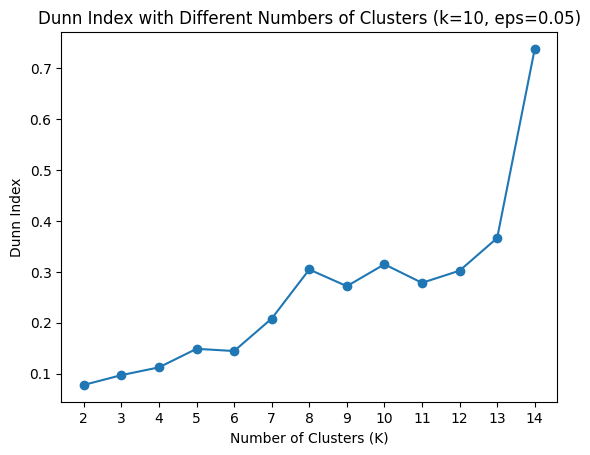

In [53]:
dunn = [dunn_index(petit_sample, model[1]) for model in k_models]
plt.plot(k_values, dunn, marker='o', linestyle='-')
plt.title('Dunn Index with Different Numbers of Clusters (k=10, eps=0.05)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Dunn Index')
plt.xticks(k_values)

Text(0, 0.5, 'Dunn Index')

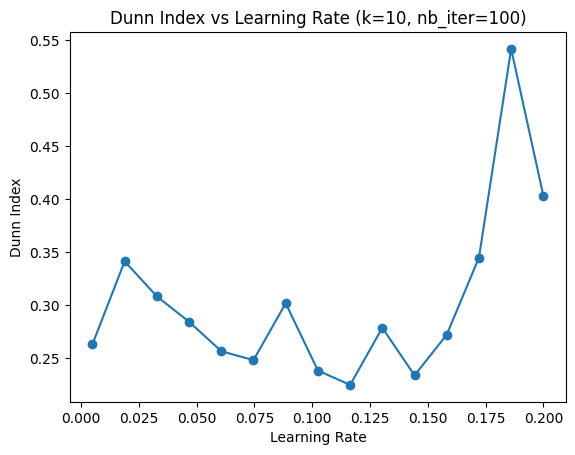

In [54]:
dunn = [dunn_index(petit_sample, model[1]) for model in k_models_1]
plt.plot(eps_values, dunn, marker='o', linestyle='-')
plt.title('Dunn Index vs Learning Rate (k=10, nb_iter=100)')
plt.xlabel('Learning Rate')
plt.ylabel('Dunn Index')

Text(0, 0.5, 'Dunn Index')

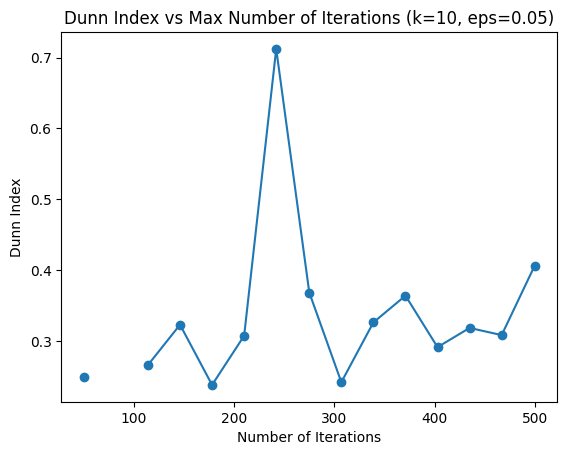

In [57]:
dunn = [dunn_index(petit_sample, model[1]) for model in k_models_2]
plt.plot(nb_iter, dunn, marker='o', linestyle='-')
plt.title('Dunn Index vs Max Number of Iterations (k=10, eps=0.05)')
plt.xlabel('Number of Iterations')
plt.ylabel('Dunn Index')

### Conclusions

L'algorithme **CHA** est globalement beaucoup plus lent par rapport au **k-moyennes**, qui se charge pratiquement instantanément pour un petit échantillon. Cependant, les deux approches d'apprentissage non supervisé sont définitivement insuffisantes pour une base de données réelle contenant des milliers d'exemples décrits par plusieurs attributs. Les principes de Feature Engineering (comme Feature Selection ou APC) pourraient aider à cet égard.

De plus, il est plus difficile d'utiliser les résultats de **CHA**, étant donné qu'ils doivent être interprétés à partir d'un dendrogramme. Il existe également avec cette méthode le risque de tomber sur des 'clusters poubelle', qui regroupent presque tous les points autour d'eux.

Pour **k-means**, augmenter $k$ réduit définitivement l'inertie des clusters jusqu'à un point d'équilibre où la différence devient imperceptible. Le taux d'apprentissage et le nombre d'itérations ont un impact beaucoup plus imprévisible sur le modèle, ils doivent donc être étudiés avec soin. Dans l'ensemble, le modèle offre des résultats satisfaisants de manière constante pour $k=10$ (le nombre réel de classes différentes), $eps=0.05$ et $nbIter=100$. C'est excellent qu'on puisse évaluer cet algorithme avec des métriques définies telles que les *indices de Dunn* et de *Xie-Beni*. 

### Le poster

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données *Pen-Based Recognition of Handwritten Digits*, les résultats obtenus lors de l'apprentissage supervisé (études et résultats de votre TME-10) et lors de l'apprentissage non-supervisé (études et résultats de votre TME-11) ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.
